In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [67]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
df.shape

(284807, 31)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [70]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [71]:
df.duplicated().any()

np.True_

In [72]:
df = df.drop_duplicates()
df.shape

(283726, 31)

In [73]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [74]:
df["Class"].value_counts() # dengesiz veri seti

,count
Class,
0,283253
1,473


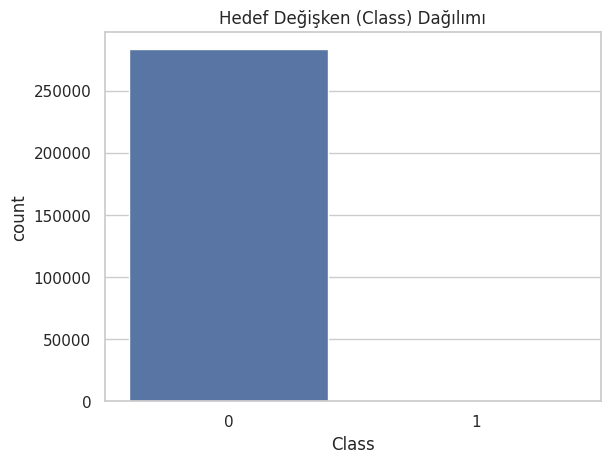

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


In [75]:
sns.countplot(x="Class", data=df)
plt.title("Hedef Değişken (Class) Dağılımı")
plt.show()

fraud_ratio = df["Class"].value_counts(normalize=True) * 100
print(fraud_ratio)


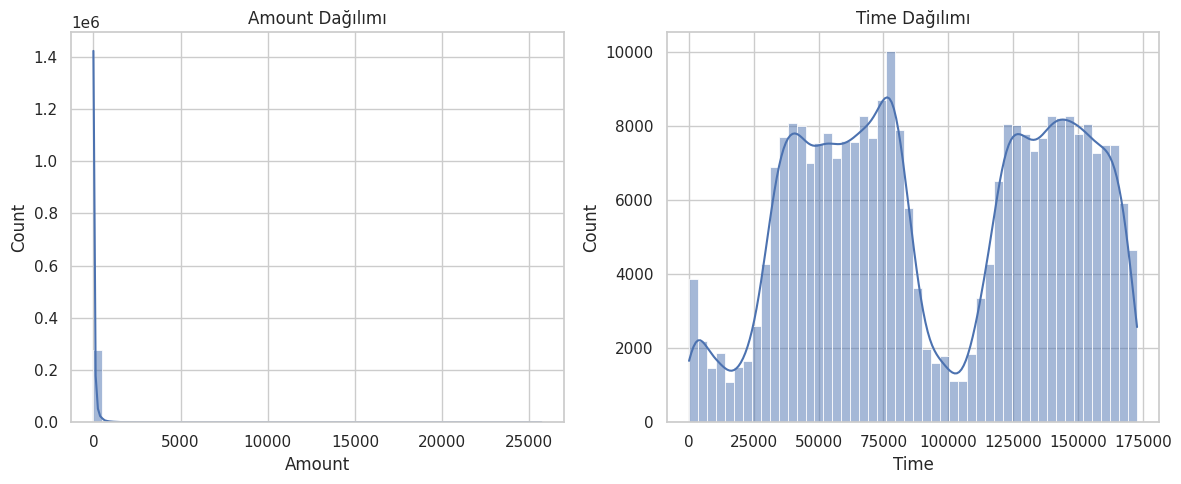

In [76]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Amount Dağılımı")

plt.subplot(1,2,2)
sns.histplot(df["Time"], bins=50, kde=True)
plt.title("Time Dağılımı")

plt.tight_layout()
plt.show()

In [77]:
df = df.drop(["Time"], axis=1)

In [78]:
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

In [79]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [80]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [81]:
# Önce veriyi bölüyoruz daha sonra SMOTE uyguluyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [82]:
# Sadece eğitim verisine SMOTE uyguluyoruz
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


Lojistik Regresyon (Threshold = 0.8)
Confusion Matrix:
[[56175   476]
 [   14    81]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.15      0.85      0.25        95

    accuracy                           0.99     56746
   macro avg       0.57      0.92      0.62     56746
weighted avg       1.00      0.99      0.99     56746

ROC-AUC Score: 0.9604

Karar Ağacı (Threshold = 0.8)
Confusion Matrix:
[[56034   617]
 [   17    78]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.11      0.82      0.20        95

    accuracy                           0.99     56746
   macro avg       0.56      0.91      0.60     56746
weighted avg       1.00      0.99      0.99     56746

ROC-AUC Score: 0.9170

Random Forest (Threshold = 0.8)
Confusion Matrix:
[[56639    12]
 [   25    70]]

Clas

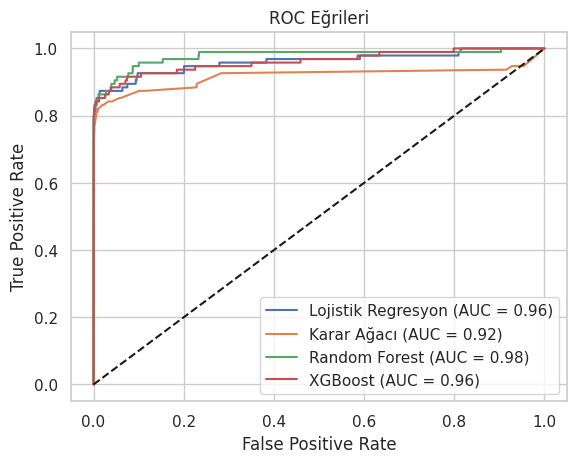

In [83]:
def evaluate_model(model, name, threshold=0.5):
    model.fit(X_train_smote, y_train_smote)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Eşik değerini ayarlıyoruz
    y_pred = (y_prob > threshold).astype(int)

    print(f"\n{name} (Threshold = {threshold})")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Modelleri Değerlendirme
threshold_value = 0.8  # Eşik değerini 0.8 olarak belirliyoruz

evaluate_model(LogisticRegression(), "Lojistik Regresyon", threshold=threshold_value)
evaluate_model(DecisionTreeClassifier(max_depth=6), "Karar Ağacı", threshold=threshold_value)
evaluate_model(RandomForestClassifier(n_estimators=100, max_depth=8), "Random Forest", threshold=threshold_value)
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost", threshold=threshold_value)

# ROC Eğrisi
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrileri")
plt.legend()
plt.grid(True)
plt.show()